<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# EDA, ANALISIS EXPLORATORIO

NOTA : este ejercico está basado en Practical Machine Learning Project in Python on House Prices Data y puedes encontrar la versión completa en:

https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/




En este ejercicio realizaremos un EDA lo más completo posible sobre un set de datos de casas, a partir del cual se intenta predecir el precio del inmueble en  Ames, Iowa, USA. 

In [27]:
from IPython.core.display import Image
Image('flujo.png',width=500, height=400)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

# Generación de la Hipótesis

¿Qué factores podrían influir en los precios de la vivienda?. 


Algunos factores que puedo pensar que influyen directamente en los precios de la vivienda son los siguientes:



*   área de la casa
*   cuantos años tiene la casa
*   Ubicación de la casa
*   ¿Qué tan cerca/lejos está el mercado?
*   Conectividad de la ubicación de la casa con el transporte.
*   cuantos pisos tiene la casa
*   ¿Qué material se utiliza en la construcción?
*   Disponibilidad de agua/electricidad
*   Zona de juegos/parques para niños (si los hay)
*   Si tiene terraza
*   Si tiene estacionamiento
*   Si hay guardias
*   etc.


# Exploración de Datos

La exploración de datos es la clave para obtener información de los datos. Los especialistas dicen que una buena estrategia de exploración de datos puede resolver incluso problemas complicados en unas pocas horas. Comencemos.

In [3]:
# CARGA DE LIBRERIAS
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [4]:
# CARGA DE DATOS DE ENTRENAMIENTO desde el disco local
#train = pd.read_csv("/data/Housing/train.csv")
#
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
train = pd.read_csv(name, sep=",")

Saving train.csv to train.csv


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# CARGA DE DATOS DE TEST desde el disco local
#test = pd.read_csv("/data/Housing/test.csv")
#
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
test = pd.read_csv(name, sep=",")

Saving test.csv to test.csv


In [7]:
print ('Los datos de entrenamiento tienen {0} filas y {1} columnas'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('Los datos de test tienen {0} filas y {1} columnas'.format(test.shape[0],test.shape[1]))

Los datos de entrenamiento tienen 1460 filas y 81 columnas
----------------------------
Los datos de test tienen 1459 filas y 80 columnas


In [8]:
#Otra forma de chequear el set de datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#CHEQUEAMOS SI HAY DATOS FALTANTES
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
# ***
# De las 81 características (columnas), 19  tienen valores nulos. Verifiquemos el porcentaje de valores faltantes en estas columnas.
#
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

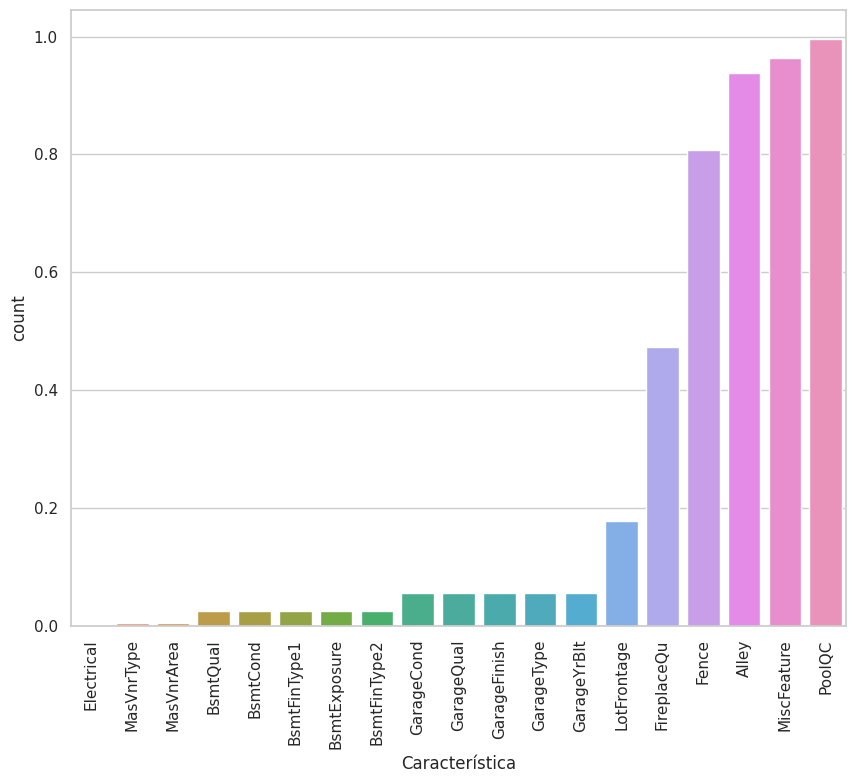

In [11]:
# **
# Podemos inferir que la variable PoolQC tiene un 99,5 % de valores faltantes, 
# seguida de MiscFeature, Alley y Fence. 
# Veamos un gráfico que explique estos valores faltantes usando un gráfico de barras.
#
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Nombre']
miss['Característica'] = miss.index

#
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Característica', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-12-f22185973eec>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

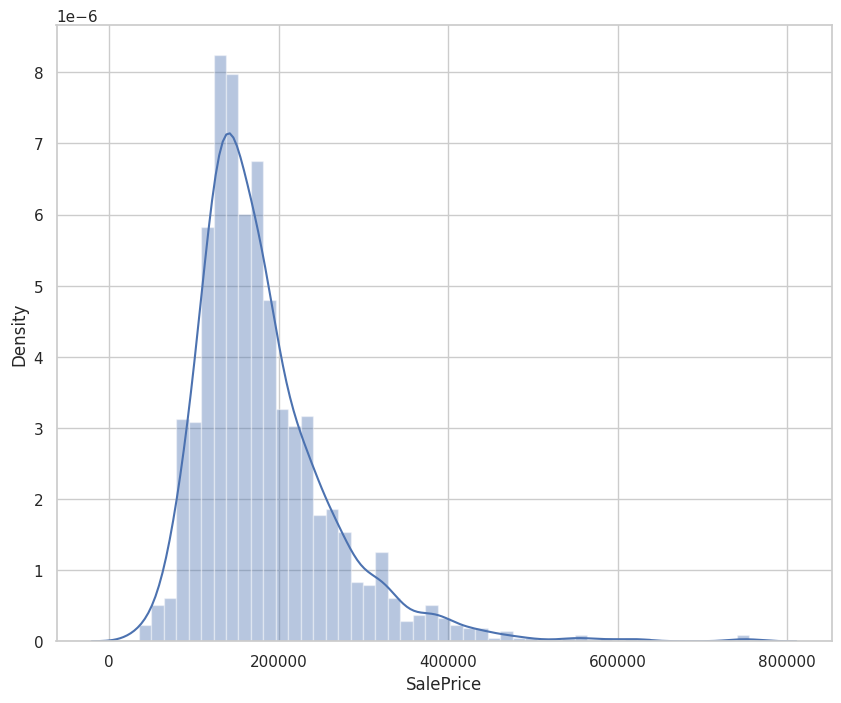

In [12]:
#**
#
# Procedemos a revisar la distribución de la variable objetivo => el precio de la vivienda
#
sns.distplot(train['SalePrice'])

Skewness is 0.12133506220520406


<ipython-input-13-acf901060ff0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='SalePrice', ylabel='Density'>

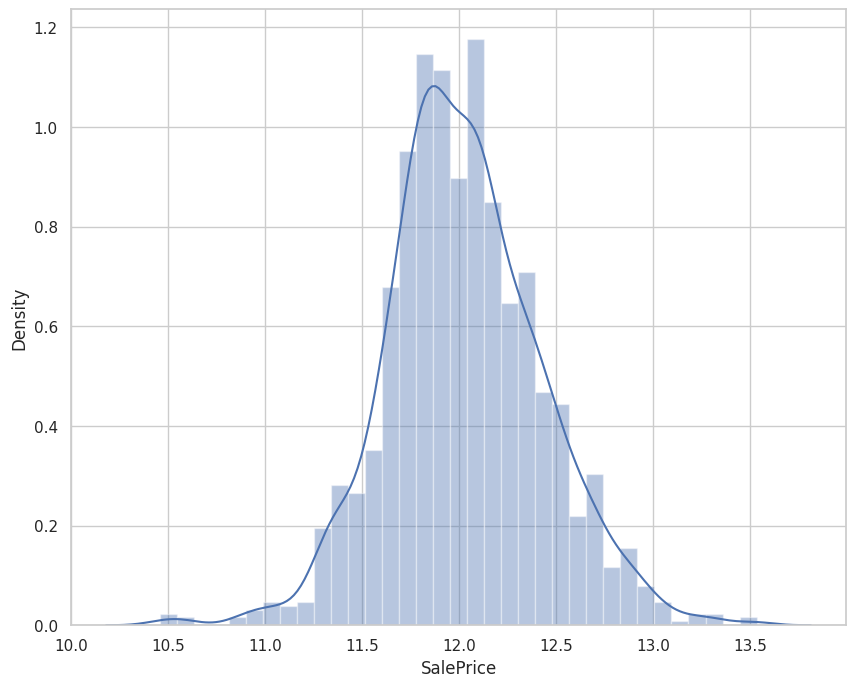

In [13]:
# ** 
#
# Vemos que la variable de destino SalePrice tiene una distribución sesgada a la derecha. 
# Tendremos que registrar la transformación de esta variable para que se distribuya normalmente. 
# Una variable de destino distribuida normalmente (o casi normal) ayuda a modelar mejor la relación 
# entre las variables de destino y las independientes. 
# Además, los algoritmos lineales suponen una varianza constante en el término de error. 
#
# Veamos como podemos acercarnos más a una distribución normal
#
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [14]:
#
# Como vio, la transformación logarítmica de la variable de destino nos ha ayudado a 
# corregir su distribución sesgada y la nueva distribución se parece más a la normal.
#

In [15]:
# ** 
#
# Dado que tenemos 80 variables, visualizar una por una no sería un enfoque astuto.
# En su lugar, veremos algunas variables en función de su correlación con la variable de destino.
# Separaremos las variables numéricas y categóricas y exploraremos estos datos desde un ángulo diferente.
#
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 38 columnas numéricas y 43 columnas categóricas en los datos de entrenamiento


In [16]:
# **
# Borraremos la columa Id de los datos numéricos
#
del numeric_data['Id']

<Axes: >

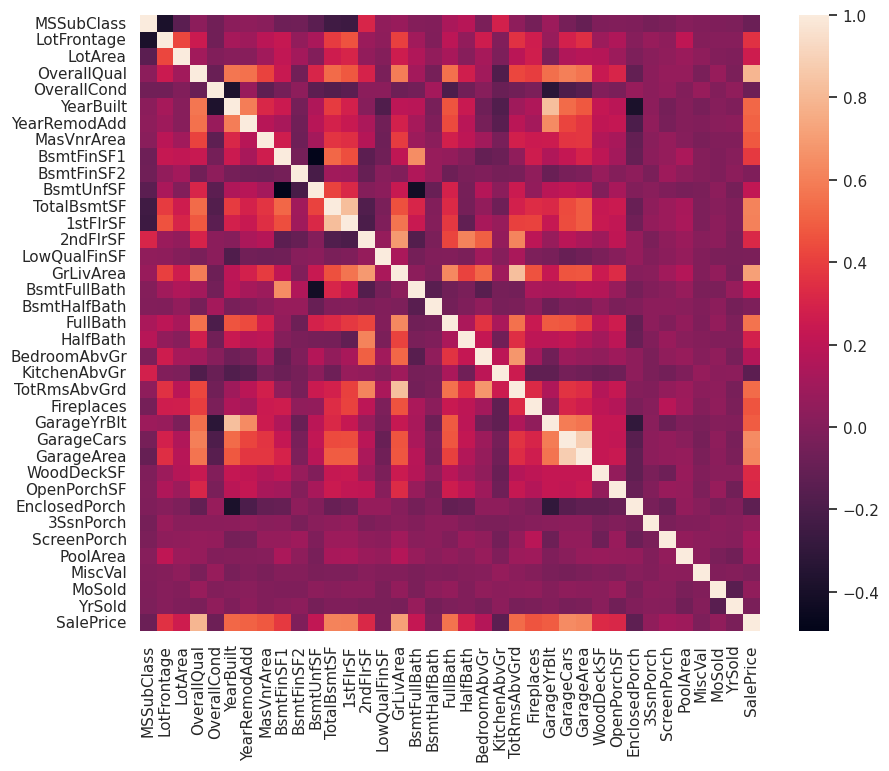

In [17]:
# **
#
# Ahora veremos la correlación entre las variables numéricas
# 
corr = numeric_data.corr()
sns.heatmap(corr)

In [18]:
# **
#
# En la última columna de la matriz de correlación, podemos ver la correlación
# de todas las variables con SalePrice.
# Veamos la misma correlación en números
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) # últimos 5 valores

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


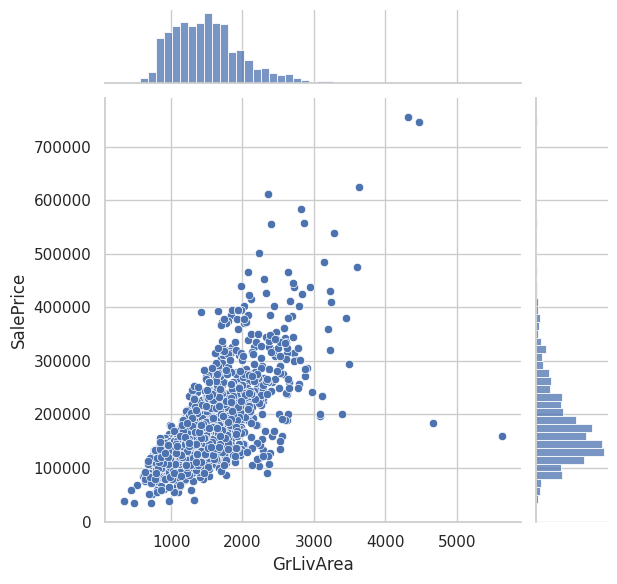

In [19]:
# **
#
# Aquí vemos que la característica OverallQual (calidad de material) está correlacionada en un 79 % con la variable de destino. 
# Además, GrLivArea (superficie habiltable) está correlacionada en un 70 % con la variable objetivo.  
# Las siguientes variables muestran que a las personas también les importa si la casa tiene garaje, el área de ese garaje, 
# el tamaño del sótano, etc.
#
# Este comportamiento es bastante normal. 
# A medida que aumenta la calidad general de una casa, también aumenta su precio de venta. 
#
# Visualicemos la siguiente variable correlacionada GrLivArea y comprendamos su comportamiento.
#
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

In [20]:
#**
#
# Como se vio anteriormente, aquí también vemos una correlación directa entre la superficie habitable y el precio de venta.
# Sin embargo, podemos detectar un valor atípico GrLivArea > 5000. 
# Hemos visto que los valores atípicos desempeñan un papel importante en el deterioro del rendimiento de un modelo.
#

In [21]:
#**
#
# Ahora, avanzaremos y exploraremos las características categóricas.
# La forma más sencilla de entender las variables categóricas es usando el comando .describe().
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [22]:
# **
#
# Comprobemos el precio de venta medio de una casa en función de su condición de venta. 
# SaleCondition explica la condición de venta. 
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


<Axes: xlabel='SaleCondition'>

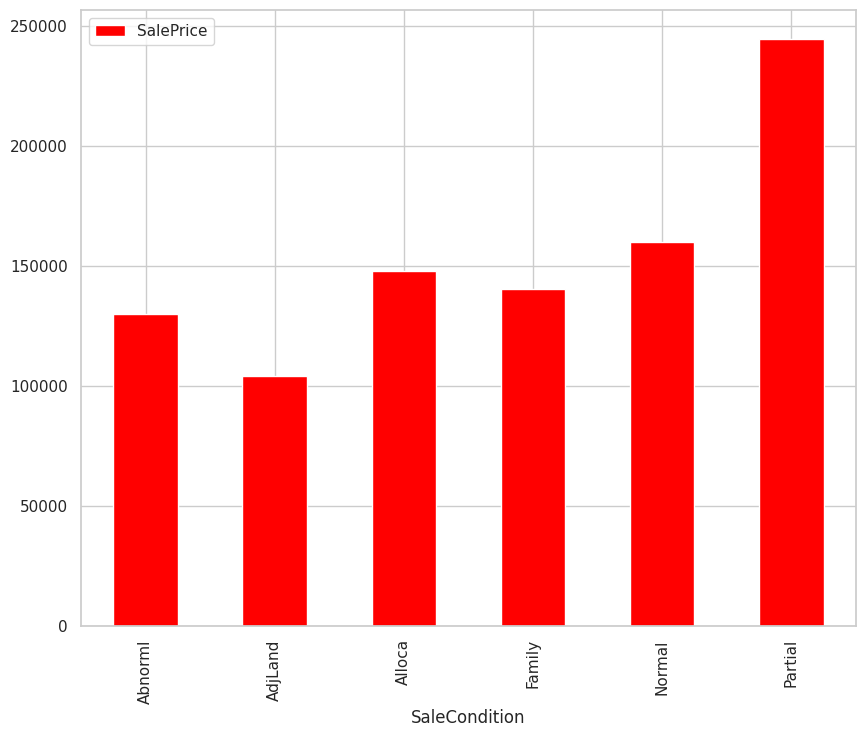

In [35]:
sp_pivot.plot(kind='bar',color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

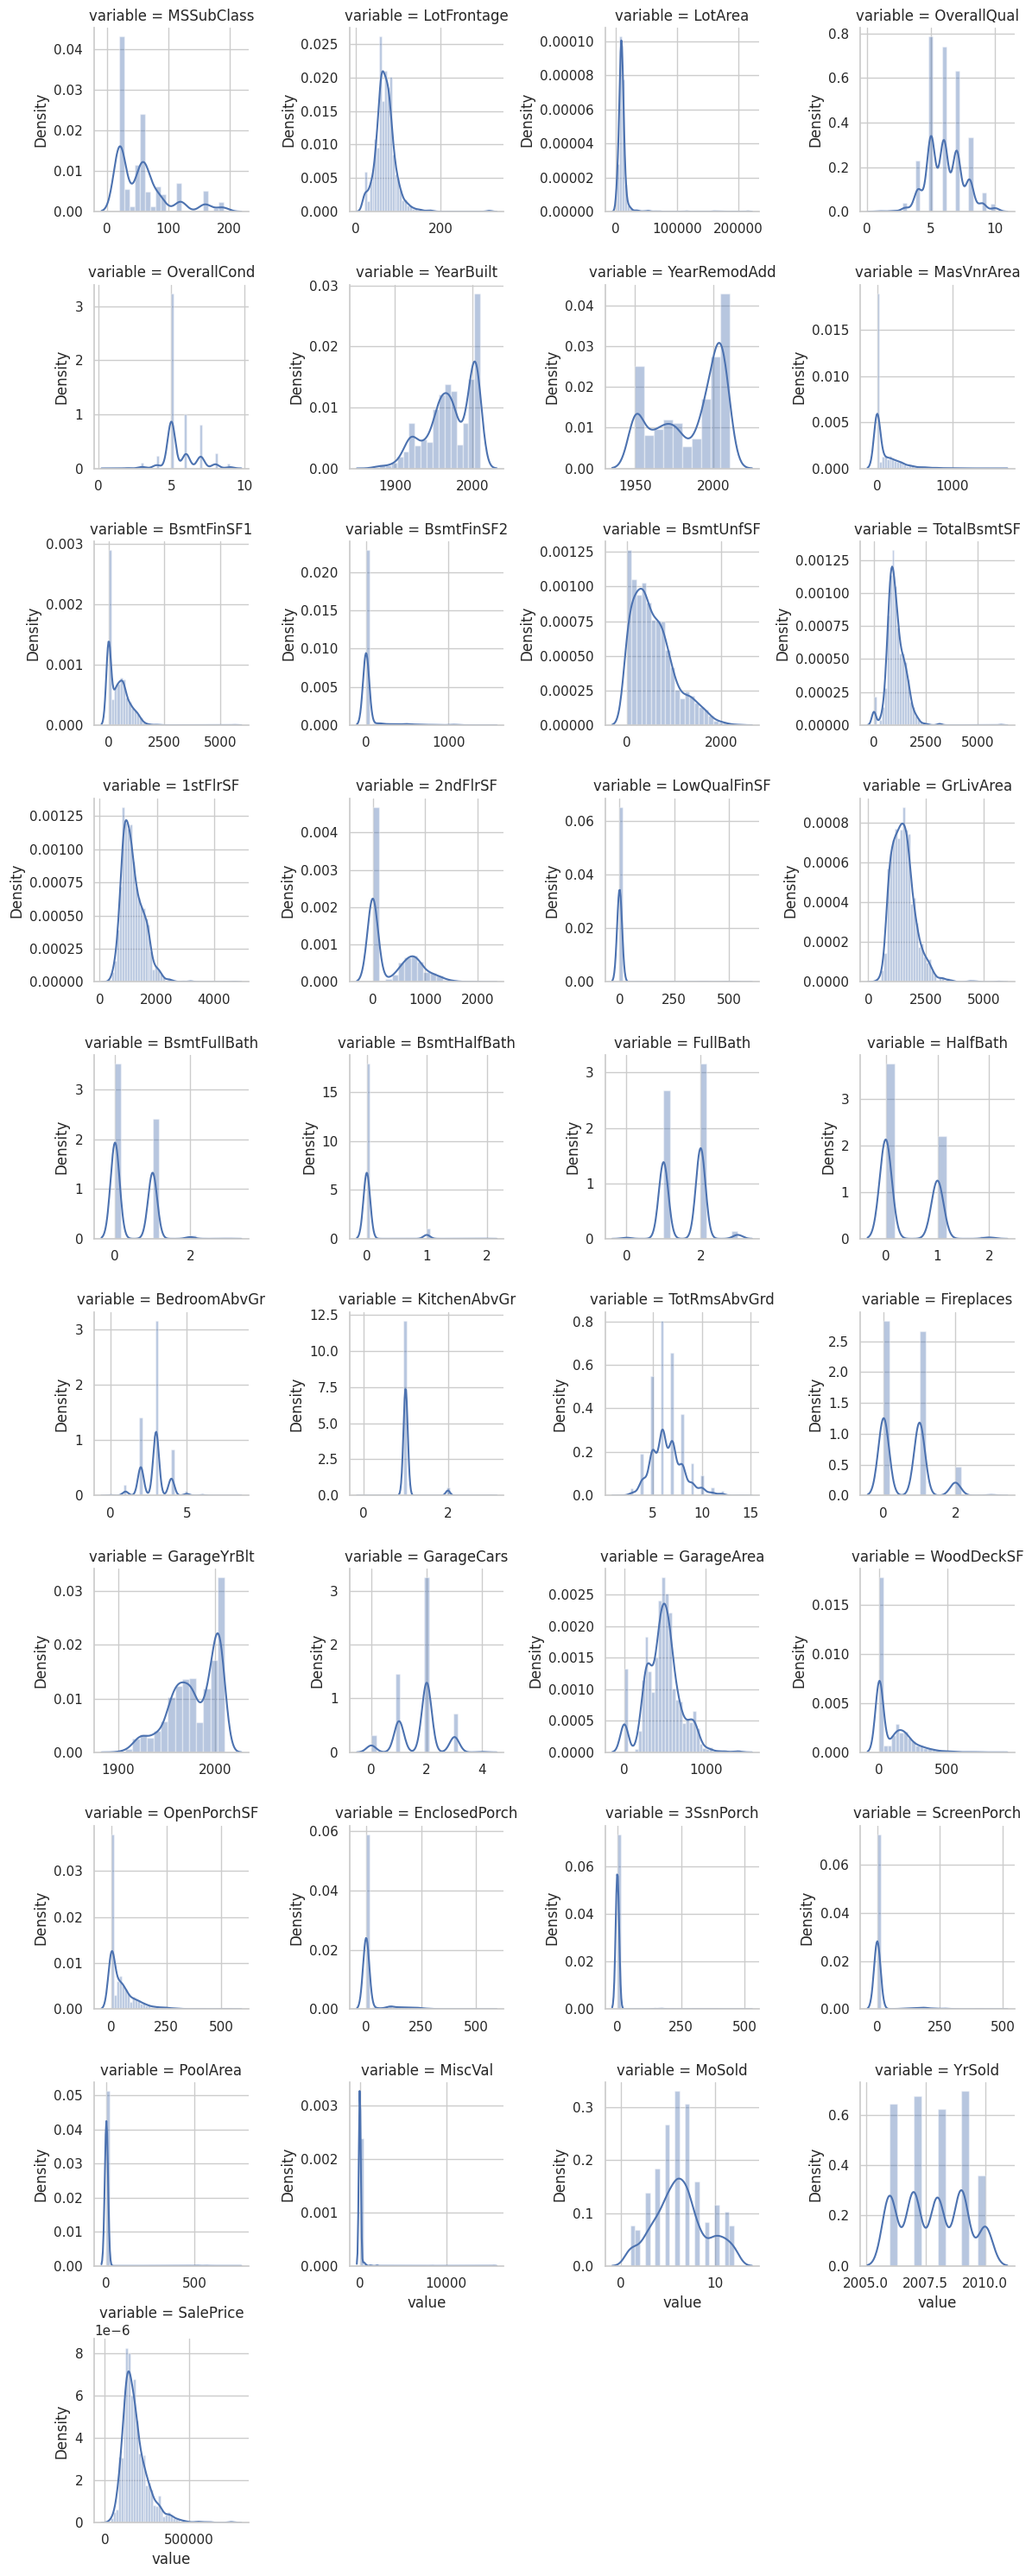

In [23]:
#**
#
# Finalmente, para obtener una visión rápida de todas las variables en un conjunto de datos, 
# tracemos histogramas para todas las variables numéricas para determinar si todas las variables están sesgadas.
#
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [25]:
# **
# 
# Ahora, creemos diagramas de caja para visualizar variables categóricas.
#
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False , size=5)
g = g.map(boxplot, 'value','SalePrice')
g

TypeError: ignored

In [42]:
# **
# Aquí, podemos ver que la mayoría de las variables poseen valores atípicos (ouliers).
# Nos llevaría días si empezáramos a tratar estos valores atípicos uno por uno.
# Esto implica, para más adelante, que deberíamos buscar modelos que no se afecten tanto con los outliers.
#

# Transformación de Datos

En esta etapa, nos ocuparemos de los valores atípicos, codificaremos variables e imputaremos los valores faltantes. 

In [ ]:
# **
# Si recuerdan, descubrimos que la variable GrLivArea tiene valores atípicos. 
# Precisamente, un punto cruzó la marca de 4000. 
# Quitémoslo.
#
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape #borrar 4 filas`
(1456, 81)

In [ ]:
# **
#
# En la fila 666, en los datos de prueba, se encontró que falta información en las variables 
# relacionadas con 'Garage' (GarageQual, GarageCond, GarageFinish, GarageYrBlt). 
# Vamos a imputarlos usando la MODA de estas respectivas variables.
# NOTA : ¿cómo se encontraron esos valores (MODA)?
#
test.loc[666, 'GarageQual'] = "TA" 
test.loc[666, 'GarageCond'] = "TA" 
test.loc[666, 'GarageFinish'] = "Unf" 
test.loc[666, 'GarageYrBlt'] = "1980"  


In [ ]:
# **
#
# En la fila 1116, en los datos de prueba, todas las variables de garaje son NA excepto GarageType. 
# Vamos a marcarlo como NA también.
# 
test.loc[1116, 'GarageType'] = np.nan

In [ ]:
# **
#
# Ahora, codificaremos todas las variables categóricas. 
# Esto es necesario porque la mayoría de los algoritmos de ML no aceptan valores categóricos, 
# sino que se espera que se conviertan en numéricos. 
# La función LABELENCODER de sklearn se usa para codificar variables. 
# Escribiremos una función para hacer esto.
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# **
# 
#
# Ahora, imputemos los valores que faltan en la variable LotFrontage usando el valor medio de LotFrontage por Neighborhood. 
# Tales estrategias de imputación se construyen durante la exploración de datos. 
# Para hacer esto, debemos combinar nuestros datos de entrenamiento y prueba para que podamos modificar ambos conjuntos 
# de datos a la vez. 
# Además, nos ahorrará tiempo.
#
alldata = train.append(test)
alldata.shape
(2915, 81)

In [ ]:
# **
# 
# Los datos combinados tienen 2915 filas y 81 columnas.
# Ahora imputaremos la variable LotFrontage
#
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
                alldata.loc[idx, 'LotFrontage'] = group.median()

In [ ]:
# **
#
# A continuación, en otras variables numéricas, imputaremos los valores faltantes por cero
#
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

In [ ]:
# **
#
# Los nombres de variables que tienen 'quality' o 'qual' en sus nombres pueden tratarse como variables ordinales.
# Ahora, convertiremos las variables categóricas en variables ordinales. 
# Para hacer esto, simplemente crearemos un diccionario de pares clave-valor y lo asignaremos a la variable en el conjunto de datos.
#
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding de datos
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode de variables e imputación de valores faltantes
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

In [ ]:
# Mostrando las 5 primeras filas del datframe alldata
alldata.head()

In [ ]:
# Recorriendo los subset para determinar si existen NaN, podemos verificar que  en Alley(2717) , Utilities(2), Electrical(1), GarageType(158), MiscFeature(2810), SalePrice(1459)
for columna in alldata.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(alldata[columna].isna().sum())

In [ ]:
# Generando una estadistica descriptiva de las variables categoricas
newData = alldata[['Alley' , 'Utilities', 'Electrical', 'GarageType', 'MiscFeature', 'SalePrice']]

for columna in newData.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(newData[columna].describe())

In [ ]:
# Verificado los datos NaN para posteriormente transformarlos
newData.isna().sum()

In [ ]:
# Información del dataframe newData
newData.info()

In [ ]:
# Datos unicos del subset MiscFeature
newData.MiscFeature.unique()

In [ ]:
# Datos unicos de los subsets
for columna in newData.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(newData[columna].unique())

In [ ]:
# Verificar la distribución Normal
newData.SalePrice.hist()

In [ ]:
# Densidad
fig = plt.figure(figsize=(7,7))
sns.distplot(newData.SalePrice, color="blue", label="SalePrice", kde= True)
plt.legend();

In [ ]:
# Curtosis
newData.SalePrice.kurt()

![](https://machinelearningparatodos.com/wp-content/uploads/2020/10/Relationship_between_mean_and_median_under_different_skewness-1024x386.png)

In [ ]:
# Algunas tendencias medias
alldata.SalePrice.mean()
alldata.Utilities.unique()
alldata.Electrical.unique()
alldata.GarageArea.isna().sum()
alldata.MiscFeature.unique()

In [ ]:
# Imputación NaN SalePrice es por la mean()
# Alley(2717) , Utilities(2), Electrical(1), GarageType(158), MiscFeature(2810), SalePrice(1459)
alldata.Alley = alldata.Alley.fillna('S/R')
alldata.SalePrice = alldata.SalePrice.fillna(alldata.SalePrice.mean())
alldata.Utilities =alldata.Utilities.fillna('S/R')
alldata.Electrical = alldata.Electrical.fillna('S/R')
alldata.MiscFeature = alldata.MiscFeature.fillna('S/R')

In [ ]:
# Datos unicos del subset Alley
alldata.Alley.unique()

In [ ]:
alldata.head()

In [ ]:
# Label Encoder de las variables categoricas
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
alldata.Alley =label_encoder.fit_transform(alldata.Alley )
alldata.Utilities =label_encoder.fit_transform(alldata.Utilities)
alldata.Electrical = label_encoder.fit_transform(alldata.Electrical)
alldata.MiscFeature = label_encoder.fit_transform(alldata.MiscFeature)

In [ ]:
alldata.head()